In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(color_codes=True)
df = pd.read_csv("./report.csv")
df_edges = pd.read_csv("./edges.csv")

In [8]:
df_edges

,v,e
0,10,17
1,11,19
2,12,21
3,13,23
4,14,25
...,...,...
446,960000,1919997
447,970000,1939997
448,980000,1959997
449,990000,1979997


In [9]:
df['v'] = df['command'].apply(lambda x: int(x.split()[2][2:-4]))
df_joined = df.join(df_edges.set_index('v'), on='v')
df_joined['v_plus_e'] = df_joined['v'] + df_joined['e']

In [10]:
df_joined

,command,mean,stddev,median,user,system,min,max,v,e,v_plus_e
0,./main < ./580000.txt,0.165408,0.003674,0.164789,0.159227,0.006223,0.161033,0.189092,580000,1159997,1739997
1,./main < ./41000.txt,0.010402,0.002384,0.010012,0.009903,0.001009,0.007840,0.018744,41000,81997,122997
2,./main < ./71000.txt,0.015699,0.000232,0.015664,0.015161,0.001058,0.015484,0.018025,71000,141997,212997
3,./main < ./430000.txt,0.104515,0.000981,0.104461,0.099771,0.004769,0.102536,0.108153,430000,859997,1289997
4,./main < ./980.txt,0.005440,0.002474,0.006625,0.003594,0.002203,0.000000,0.007804,980,1957,2937
...,...,...,...,...,...,...,...,...,...,...,...
446,./main < ./79.txt,0.005587,0.001508,0.006040,0.003474,0.002385,0.000000,0.007063,79,155,234
447,./main < ./360.txt,0.005407,0.001984,0.006210,0.003267,0.002401,0.000000,0.007290,360,717,1077
448,./main < ./3800.txt,0.007541,0.002595,0.008531,0.005357,0.002410,0.000000,0.009780,3800,7597,11397
449,./main < ./900000.txt,0.284096,0.001818,0.284110,0.275005,0.009000,0.281198,0.294381,900000,1799997,2699997


In [11]:
from scipy import stats
r_value_n = stats.linregress(df_joined['v'], df_joined['mean'])[2]

r_value_n**2

0.9896678317209433

Text(0.5, 1.0, 'Complexidade Temporal do Problema')

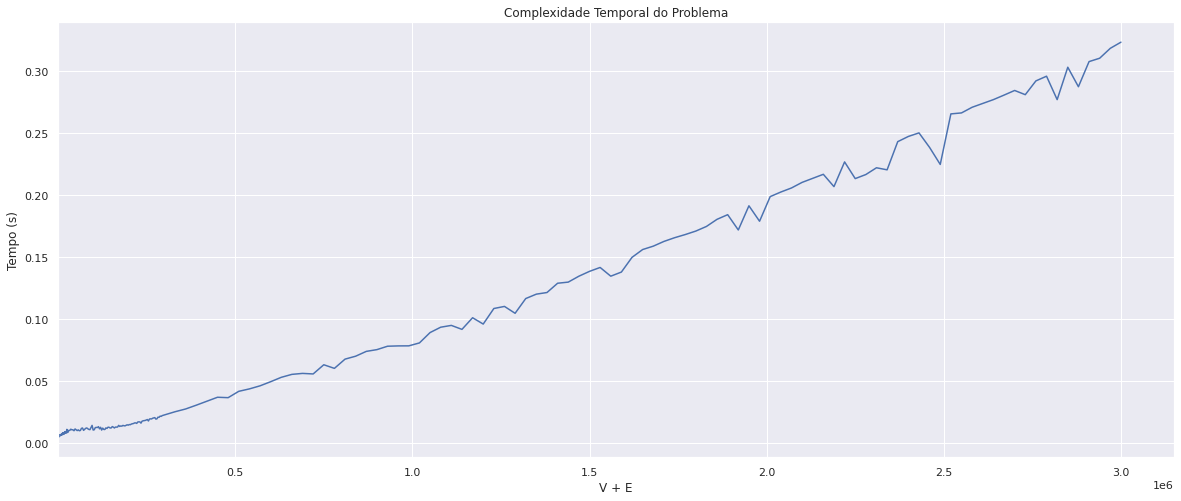

In [12]:
plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="v_plus_e", y="mean", data=df_joined, err_style="bars", ci="sd")
ax.set_xlim(left=10)
ax.set_xlabel("V + E")
ax.set_ylabel("Tempo (s)")
#ax.set_xscale("function", functions=(lambda x: x * np.log10(x), lambda x: x))
plt.title("Complexidade Temporal do Problema")